<a href="https://colab.research.google.com/github/testgithubmo/Assignment-1/blob/main/Quantinum_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#IMPORT THE FILES

In [2]:
dataset = pd.read_csv("/content/QVI_data.csv")
dataset

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [3]:
dataset["DATE"].dtype

dtype('O')

In [ ]:
#FIRST LET'S CREATE A MONTH AND YEAR COLUMN

In [4]:
dataset["DATE"] = pd.to_datetime(dataset["DATE"])
dataset["MONTH_YEAR"] = dataset["DATE"].dt.strftime("%m/%Y")
dataset["MONTH_YEAR"]

,MONTH_YEAR
0,10/2018
1,09/2018
2,03/2019
3,03/2019
4,11/2018
...,...
264829,12/2018
264830,10/2018
264831,10/2018
264832,10/2018


In [ ]:
#GROUPING BY STORE NUMBER AND MONTH YEAR

In [5]:
chips_grp_before = dataset.groupby(["STORE_NBR", "MONTH_YEAR"])
total_grp = chips_grp_before["TOT_SALES"].sum()
total_grp

STORE_NBR  MONTH_YEAR
1          01/2019       154.80
           02/2019       225.40
           03/2019       192.90
           04/2019       192.90
           05/2019       221.40
                          ...  
272        08/2018       372.85
           09/2018       304.70
           10/2018       430.60
           11/2018       376.20
           12/2018       403.90
Name: TOT_SALES, Length: 3169, dtype: float64

In [ ]:
#LOOKING AT TOTAL SALES BY STORE NUMBER

In [7]:
chips_grp_sales = dataset.groupby("STORE_NBR")
total_sales = chips_grp_sales["TOT_SALES"].sum()
total_sales

,TOT_SALES
STORE_NBR,
1,2393.60
2,2005.80
3,12802.45
4,14647.65
5,9500.80
...,...
268,2601.05
269,11221.80
270,11293.95


In [ ]:
#LOOKING FOR TOTAL SALES IN TRIAL STORES

In [8]:
trial_store = total_sales[76:88]
trial_store

,TOT_SALES
STORE_NBR,
77,3040.00
78,9381.25
79,11831.20
80,11756.90
81,14361.95
82,4103.50
83,9924.90
84,5396.30
85,13.90


In [ ]:
TOTAL SALES IN TRIAL STORES - STORE 77 : 3040.00 -STORE83:10635.35 - STORE 88 : $16333.25

NOW SINCE WE HAVE THE TOTAL SALES FOR THE TRIAL STORES. LETS LOOK FOR MATCHING CONTROL STORES FOR EACH. THERE ARE 272 STORES. I WILL USE 2 METHODS TO DETERMINE A CONTROL STORE. I WILL FIRST GO BY TOTAL SALES TO FIND STORES WITH SIMILAR TOTAL SALES. THEN I WILL USE THE PEARSON CORRELATIONS TEST TO DETERMINE HOW CORRELATED THE STORES ARE.

In [ ]:
#SORTING STORES BY TOTAL SALES LOOKING FOR A MATCH FOR STORE 77

In [9]:
total_sorted = total_sales.sort_values(ascending=True)
total_sorted.iloc[57:75]

,TOT_SALES
STORE_NBR,
41,2570.20
268,2601.05
195,2608.25
163,2635.70
6,2684.90
53,2715.05
214,2720.40
176,2752.90
233,2826.90


In [ ]:
#ISOLATING THE STORES

In [10]:
stores_control_one = [41, 268, 195, 163, 6, 53, 214, 176, 233, 255, 185, 187, 205, 220, 50, 46, 141, 77]
control_one = pd.DataFrame({"Value" : total_grp[stores_control_one]})
print(control_one)

                      Value
STORE_NBR MONTH_YEAR       
41        01/2019     169.0
          02/2019     234.6
          03/2019     226.2
          04/2019     231.3
          05/2019     258.8
...                     ...
77        08/2018     255.5
          09/2018     225.2
          10/2018     204.5
          11/2018     245.3
          12/2018     267.3

[216 rows x 1 columns]


In [ ]:
#PUTTING THE STORES IN A PIVOT CHART FORMAT

In [11]:
pivot_chips1 = control_one.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="Value")
pivot_chips1

STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,195,205,214,220,233,255,268
MONTH_YEAR,,,,,,,,,,,,,,,,,,
01/2019,191.1,169.0,176.20,223.9,172.90,204.4,340.3,208.9,187.2,261.1,184.2,153.30,256.1,232.5,238.7,177.5,231.7,157.70
02/2019,224.0,234.6,222.40,154.5,179.10,235.0,246.7,182.0,248.7,217.8,246.5,185.50,171.8,209.5,202.9,244.0,215.7,165.00
03/2019,179.5,226.2,259.20,227.0,225.80,278.5,241.7,268.8,246.4,245.3,247.2,186.70,331.1,286.5,269.3,199.1,206.6,225.00
04/2019,197.9,231.3,260.00,242.4,227.80,263.5,186.2,198.3,227.4,283.6,240.2,181.70,195.1,255.2,220.1,158.6,239.4,191.50
05/2019,257.3,258.8,243.55,219.5,272.35,299.3,194.9,233.8,289.5,314.6,218.3,261.30,246.7,203.0,259.6,344.4,220.7,245.80
06/2019,207.4,237.7,280.30,270.8,198.90,264.7,238.4,240.3,269.3,222.8,255.3,184.60,227.9,252.1,267.7,221.0,316.3,224.70
07/2018,260.0,216.4,253.00,314.4,229.80,296.8,272.8,188.6,287.2,225.6,253.9,227.50,320.6,182.4,244.1,290.7,254.1,224.00
08/2018,203.2,209.8,240.70,292.4,255.10,255.5,225.3,183.1,147.1,276.3,214.3,332.25,283.6,249.4,275.0,285.9,171.9,322.65
09/2018,207.7,216.1,233.00,258.8,188.00,225.2,232.8,269.5,195.4,196.9,276.1,152.90,215.5,218.6,219.3,228.6,227.7,174.40


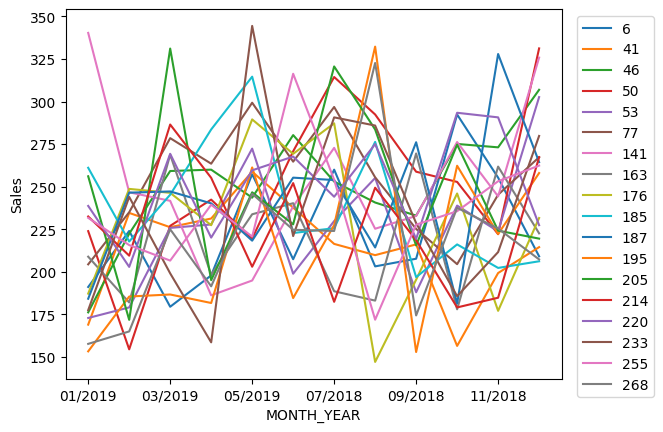

In [12]:
pivot_chips1.plot()
plt.legend(loc = "upper right", bbox_to_anchor = (1.20, 1))
plt.ylabel("Sales")
plt.show()

In [ ]:
THAT'S AN UGLY LOOKING LINE CHART. LETS TAKE A CLOSER LOOK AT THE CORRELATIONS BETWEEN THEM AND RECHART JUST THE TWO.

LOOKING AT CORRELATION

In [13]:
pivot_chips1.corr(method="pearson")

STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,195,205,214,220,233,255,268
STORE_NBR,,,,,,,,,,,,,,,,,,
6,1.000000,-0.247151,0.256520,0.006834,0.242594,-0.021268,-0.027162,-0.295525,0.345540,-0.155127,-0.041647,0.398130,0.088312,-0.878726,0.416445,0.270639,0.132702,0.219004
41,-0.247151,1.000000,0.164603,-0.119241,0.167031,0.762292,-0.644727,0.275608,0.450519,0.339814,0.349995,-0.047535,-0.237444,0.292472,-0.341097,0.500753,0.069930,0.064578
46,0.256520,0.164603,1.000000,0.503370,0.650741,0.386913,-0.113383,0.165461,0.269525,-0.330201,0.420943,0.374234,0.005459,0.133498,0.322455,0.116010,0.457896,0.348140
50,0.006834,-0.119241,0.503370,1.000000,0.560896,0.304387,0.277132,-0.068682,-0.021411,-0.155053,0.052646,0.423526,0.374344,0.186751,0.141485,0.284899,0.264615,0.404818
53,0.242594,0.167031,0.650741,0.560896,1.000000,0.526309,-0.042187,-0.074408,0.140227,0.238337,0.004825,0.763772,0.209564,0.141150,0.265352,0.546609,-0.080768,0.583553
77,-0.021268,0.762292,0.386913,0.304387,0.526309,1.000000,-0.413535,0.167020,0.531159,0.373824,0.285749,0.271905,0.291275,0.208531,0.013562,0.613063,0.099836,0.372558
141,-0.027162,-0.644727,-0.113383,0.277132,-0.042187,-0.413535,1.000000,-0.152094,-0.125022,-0.434634,-0.198275,-0.090739,0.163641,-0.004689,-0.060033,-0.127935,0.205388,-0.324463
163,-0.295525,0.275608,0.165461,-0.068682,-0.074408,0.167020,-0.152094,1.000000,-0.063802,-0.216258,0.600451,-0.399545,0.010123,0.260964,0.137705,-0.061831,0.217826,-0.155875
176,0.345540,0.450519,0.269525,-0.021411,0.140227,0.531159,-0.125022,-0.063802,1.000000,0.089027,-0.097138,-0.118839,0.118971,-0.152799,-0.108080,0.292296,0.425772,-0.149257


In [ ]:
STORE 41 AND 77 HAS HAS THE STRONGEST CORRELATION AT 0.762. LETS GRAPH IT.

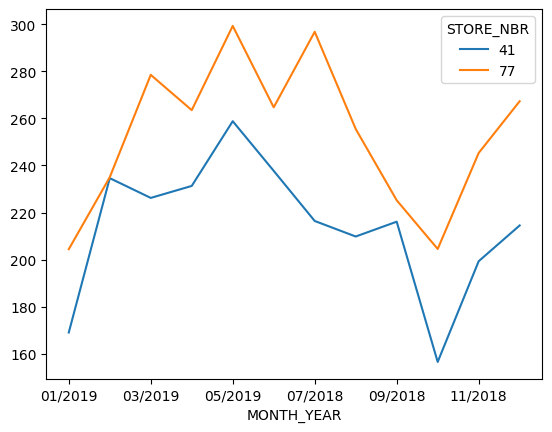

In [14]:
chips1_graph = pivot_chips1[[41, 77]]
chips1_graph.plot()
plt.show()

In [ ]:
CHECKING CORRELATIONS ON ENTIRE TABLE

In [15]:
total_grp_df = pd.DataFrame(total_grp)
total_grp_pivot = total_grp_df.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="TOT_SALES")
total_grp_pivot_table = total_grp_pivot.corr(method="pearson")
total_grp_pivot_table[77].sort_values(ascending=False).head(10)

,77
STORE_NBR,
31,1.000000
77,1.000000
11,1.000000
41,0.762292
35,0.699708
167,0.696075
184,0.645118
63,0.633858
234,0.632204


In [ ]:
THESE ARE THE TOP 10 CORRELATIONS TO STORE 77. STORE 41 WOULD BE RANKED IN 3RD PLACE. LETS LOOK AT THE OTHER STORES BY TOTAL SALES BEFORE I MAKE A DECISION.

In [16]:
# GRABBING THE TOTAL SALES SORTED SERIES TO SEE HOW THE SALES STACK UP FOR THE TOP 4 ABOVE BY STRONGEST CORRELATION
total_sorted.loc[[31, 11, 41, 35]]

,TOT_SALES
STORE_NBR,
31,14.8
11,6.7
41,2570.2
35,1608.9


In [ ]:
STORE 31 & 11 SALES ARE WAY TOO LOW TO USE.

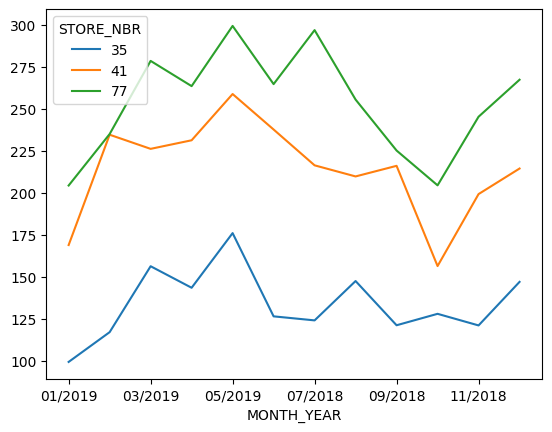

In [17]:
# GRABBING STORE 41, 35, 77 FROM TOTAL GROUP DATAFRAME
three_amigos_77 = total_grp[[41, 35, 77]]

# MAKING DATAFRAME
amigos_77_df = pd.DataFrame(three_amigos_77)

# PIVOTING THE DATAFRAME
amigos_77_pivot = amigos_77_df.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="TOT_SALES")
amigos_77_pivot.plot()
plt.show()

In [ ]:
STORE 35 EVEN THOUGH IT HAS A GOOD CORRELATION STORE 41 IS A MUCH BETTER FIT. STORE 31 & 11 EVEN THOUGH ARE A BEST MATCH CORRELATION WISE IT DOES NOT MAKE SENSE WITH SALES VOLUME. SO I WILL GO WITH STORE 41.

FOR TRIAL STORE 77, I WILL USE STORE NUMBER 41 AS A CONTROL STORE. IT'S A 0.76 CORRELATION.

SORTING STORES BY TOTAL SALES LOOKING FOR A MATCH FOR STORE 86

In [18]:
total_sorted.iloc[178:201]

,TOT_SALES
STORE_NBR,
109,10399.10
191,10404.70
196,10408.20
229,10417.90
97,10432.05
102,10440.70
105,10472.50
232,10485.30
57,10532.30


In [ ]:
ISOLATING THE STORES

In [19]:
stores_control_two = [109, 191, 196, 229, 97, 102, 105, 232, 57, 172, 113, 225, 62, 236, 227, 155, 86, 247, 13, 164, 106, 55, 138]
control_two = pd.DataFrame({"Value" : total_grp[stores_control_two]})
print(control_two)

                       Value
STORE_NBR MONTH_YEAR        
109       01/2019      858.6
          02/2019      858.4
          03/2019     1039.2
          04/2019      728.6
          05/2019      720.6
...                      ...
138       08/2018      707.4
          09/2018      913.6
          10/2018     1015.4
          11/2018      991.4
          12/2018      918.0

[276 rows x 1 columns]


In [ ]:
PUTTING THE STORES IN A PIVOT CHART FORMAT

In [20]:
pivot_chips2 = control_two.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="Value")
pivot_chips2

STORE_NBR,13,55,57,62,86,97,102,105,106,109,...,164,172,191,196,225,227,229,232,236,247
MONTH_YEAR,,,,,,,,,,,,,,,,,,,,,
01/2019,927.0,1003.20,852.8,887.8,841.40,844.60,898.0,807.0,869.60,858.6,...,950.2,897.2,851.6,919.4,845.0,986.0,822.4,811.2,838.2,906.2
02/2019,868.0,757.80,919.8,864.4,913.20,755.20,773.4,751.8,833.20,858.4,...,753.8,918.4,848.8,732.0,782.8,804.4,827.6,899.9,914.8,930.2
03/2019,1035.6,943.60,807.4,889.8,1026.80,853.60,821.8,916.8,938.60,1039.2,...,991.0,727.2,965.4,980.8,829.0,999.4,1031.8,818.4,896.8,888.4
04/2019,1024.4,851.80,900.0,885.2,848.20,813.00,718.6,944.6,815.40,728.6,...,1015.6,903.0,1008.8,906.6,1026.2,826.6,914.6,762.6,848.0,1032.0
05/2019,803.2,736.85,846.7,754.9,889.30,883.30,890.9,818.1,878.75,720.6,...,874.1,811.6,740.9,901.3,899.6,837.6,815.3,928.0,979.0,932.5
06/2019,840.6,999.60,911.0,846.8,838.00,862.00,950.0,835.0,690.20,814.0,...,795.0,1072.0,888.2,761.2,938.4,818.0,879.8,668.2,785.0,890.4
07/2018,811.8,889.60,839.6,983.6,892.20,848.20,782.4,928.9,1042.80,884.0,...,853.2,820.8,826.2,876.2,865.0,885.8,876.0,1026.7,952.0,852.4
08/2018,756.9,910.30,915.4,792.4,764.05,917.35,986.4,923.7,799.85,828.3,...,920.2,758.0,861.4,848.7,833.4,862.3,757.8,727.9,970.8,781.0
09/2018,840.0,1028.80,792.8,972.8,914.60,908.80,970.4,846.6,1158.40,871.4,...,841.4,816.4,803.2,858.4,958.4,779.0,916.8,939.8,864.6,852.4


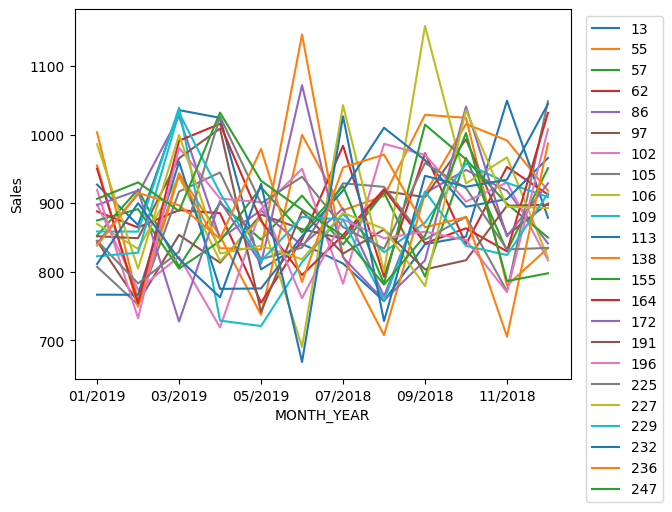

In [21]:
pivot_chips2.plot()
plt.legend(loc = "upper right", bbox_to_anchor = (1.20, 1))
plt.ylabel("Sales")
plt.show()

In [ ]:
THAT'S AN UGLY LOOKING LINE CHART. LETS TAKE A CLOSER LOOK AT THE CORRELATIONS BETWEEN THEM AND RECHART JUST THE TWO.

LOOKING AT CORRELATION

In [22]:
pivot_chips2.corr(method="pearson")

STORE_NBR,13,55,57,62,86,97,102,105,106,109,...,164,172,191,196,225,227,229,232,236,247
STORE_NBR,,,,,,,,,,,,,,,,,,,,,
13,1.000000,-0.125341,-0.291218,0.365314,0.457947,-0.373037,-0.377415,-0.059766,0.049336,0.324289,...,0.357477,-0.091999,0.733656,0.166098,0.043419,0.289917,0.508201,-0.084443,-0.597718,0.167139
55,-0.125341,1.000000,-0.039301,0.181823,0.043906,0.495256,0.418809,0.124132,0.181864,0.326968,...,0.060884,0.250338,0.018181,0.101949,0.338013,0.354941,0.234072,-0.320462,-0.206578,0.096625
57,-0.291218,-0.039301,1.000000,-0.428165,-0.402687,0.221201,-0.139586,0.301428,-0.658612,-0.124668,...,0.060840,0.665384,0.081015,-0.113210,-0.005863,0.106827,-0.335684,-0.100878,0.237461,0.237256
62,0.365314,0.181823,-0.428165,1.000000,0.276452,-0.184301,-0.206387,0.113294,0.634354,0.426023,...,-0.006044,-0.100249,0.227897,0.049385,0.005783,-0.028706,0.426077,0.461276,-0.334550,-0.295701
86,0.457947,0.043906,-0.402687,0.276452,1.000000,-0.015617,-0.226422,-0.202451,0.510548,0.643075,...,-0.117970,-0.156398,0.043345,0.081832,-0.109479,0.393785,0.596886,0.327006,-0.164982,0.250601
97,-0.373037,0.495256,0.221201,-0.184301,-0.015617,1.000000,0.578719,0.334039,0.203434,0.241536,...,0.140764,0.128774,-0.359215,0.240357,0.224941,0.403000,-0.120038,0.141757,0.162069,-0.106598
102,-0.377415,0.418809,-0.139586,-0.206387,-0.226422,0.578719,1.000000,-0.303843,0.088393,0.057036,...,-0.324841,0.000426,-0.454167,-0.283326,-0.023039,-0.009479,-0.406497,-0.251850,-0.245020,-0.460621
105,-0.059766,0.124132,0.301428,0.113294,-0.202451,0.334039,-0.303843,1.000000,-0.084228,0.117184,...,0.754963,-0.099642,0.374381,0.730895,0.169544,0.159843,0.407354,0.176014,0.520565,-0.131195
106,0.049336,0.181864,-0.658612,0.634354,0.510548,0.203434,0.088393,-0.084228,1.000000,0.363415,...,-0.132514,-0.452421,-0.327944,0.110802,0.053068,0.054562,0.233852,0.599607,-0.022502,-0.155990


In [ ]:
STORE 109 AND 86 HAS HAS THE STRONGEST CORRELATION AT 0.643. LETS GRAPH IT.

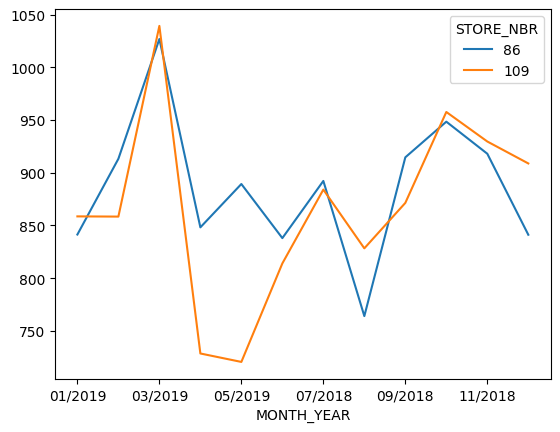

In [23]:
chips2_graph = pivot_chips2[[86, 109]]
chips2_graph.plot()
plt.show()

In [ ]:
CHECKING CORRELATIONS ON ENTIRE TABLE

In [24]:
total_grp_pivot_table[86].sort_values(ascending=False).head(10)

,86
STORE_NBR,
31,1.000000
86,1.000000
193,0.933364
159,0.675773
231,0.674071
109,0.643075
132,0.629011
260,0.623775
61,0.617243


In [ ]:
THESE ARE THE TOP 10 CORRELATIONS TO STORE 86. STORE 109 WOULD BE RANKED IN 5TH PLACE. LETS LOOK AT THE OTHER STORES BY TOTAL SALES BEFORE I MAKE A DECISION.

In [25]:
# GRABBING THE TOTAL SALES SORTED SERIES TO SEE HOW THE SALES STACK UP FOR THE TOP 5 ABOVE BY STRONGEST CORRELATION
total_sorted.loc[[31, 193, 159, 231, 109]]

,TOT_SALES
STORE_NBR,
31,14.8
193,13.1
159,338.9
231,12996.0
109,10399.1


In [ ]:
STORE 31, 159, & 193 SALES ARE WAY TOO LOW TO USE.

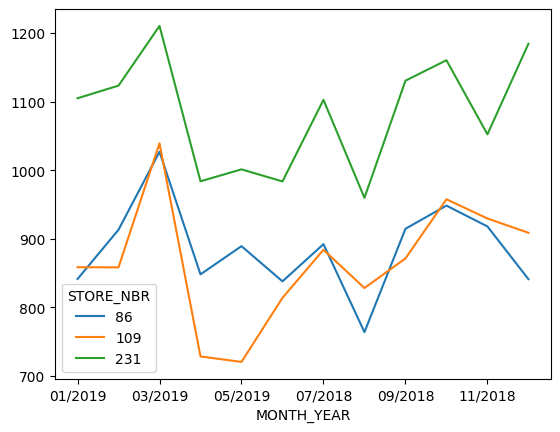

In [26]:
# GRABBING STORE 231, 109, 86 FROM TOTAL GROUP DATAFRAME
three_amigos_86 = total_grp[[231, 109, 86]]

# MAKING DATAFRAME
amigos_86_df = pd.DataFrame(three_amigos_86)

# PIVOTING THE DATAFRAME
amigos_86_pivot = amigos_86_df.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="TOT_SALES")
amigos_86_pivot.plot()
plt.show()

In [ ]:
STORE 231 EVEN THOUGH IT HAS A GOOD CORRELATION STORE 109 IS A MUCH BETTER FIT. STORE 31 EVEN THOUGH is A BEST MATCH CORRELATION WISE IT DOES NOT MAKE SENSE WITH SALES VOLUME. SO I WILL GO WITH STORE 41.

FOR TRIAL STORE 86, I WILL USE STORE NUMBER 109 AS A CONTROL STORE. IT'S A 0.643 CORRELATION.

SORTING STORES BY TOTAL SALES LOOKING FOR A MATCH FOR STORE 88

In [27]:
# LOOKING FOR CONTROL STORE FOR STORE 88
# REUSING TOTAL GROUP PIVOT TABLE TO FIND TOP 10 CORRELATED STORES
total_grp_pivot_table[88].sort_values(ascending=False).head(10)

,88
STORE_NBR,
206,1.000000
88,1.000000
159,0.862608
193,0.836296
201,0.737583
188,0.733516
229,0.707309
228,0.697039
61,0.686658


In [ ]:
THESE ARE THE TOP 10 CORRELATIONS TO STORE 88. LETS LOOK AT THE OTHER STORES BY TOTAL SALES BEFORE I MAKE A DECISION.

In [28]:
# GRABBING THE TOTAL SALES SORTED SERIES TO SEE HOW THE SALES STACK UP FOR THE TOP 5 ABOVE BY STRONGEST CORRELATION
total_sorted.loc[[206, 88, 159, 193, 201, 188, 229, 228, 61, 140]]

,TOT_SALES
STORE_NBR,
206,7.60
88,16333.25
159,338.90
193,13.10
201,14298.70
188,3086.00
229,10417.90
228,4236.30
61,562.90


In [ ]:
STORE 206, 159, 188, 228, 61, 140, & 193 SALES ARE WAY TOO LOW TO USE.

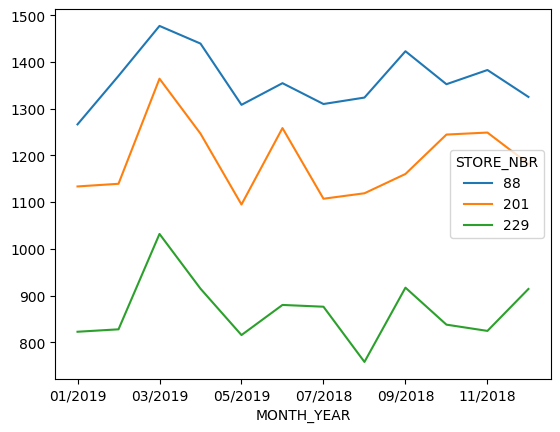

In [29]:
# GRABBING STORE 201, 229, 88 FROM TOTAL GROUP DATAFRAME
three_amigos_88 = total_grp[[201, 229, 88]]

# MAKING DATAFRAME
amigos_88_df = pd.DataFrame(three_amigos_88)

# PIVOTING THE DATAFRAME
amigos_88_pivot = amigos_88_df.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="TOT_SALES")
amigos_88_pivot.plot()
plt.show()

In [ ]:
STORE 201 COMES CLOSE TO THE PATTERN OF STORE 88

In [30]:
sorted_88 = total_grp_pivot_table[88].sort_values(ascending=False)
sorted_88[201]

0.7375831241350634

In [ ]:
STORE 229 EVEN THOUGH IT HAS A GOOD CORRELATION STORE 201 IS A MUCH BETTER FIT. STORE 206 EVEN THOUGH is A BEST MATCH CORRELATION WISE IT DOES NOT MAKE SENSE WITH SALES VOLUME. SO I WILL GO WITH STORE 201.

FOR TRIAL STORE 88, I WILL USE STORE NUMBER 201 AS A CONTROL STORE. IT'S A 0.737 CORRELATION.

In [31]:
# CREATING NEW DATAFRAME FOR TRIAL & CONTROL STORE
# Selecting trial and control stores from chips_trial
trial_store_77 = dataset.loc[dataset["STORE_NBR"] == 77]
control_store_41 = dataset.loc[dataset["STORE_NBR"] == 41]

trial_store_86 = dataset.loc[dataset["STORE_NBR"] == 86]
control_store_109 = dataset.loc[dataset["STORE_NBR"] == 109]

trial_store_88 = dataset.loc[dataset["STORE_NBR"] == 88]
control_store_201 = dataset.loc[dataset["STORE_NBR"] == 201]

trial_store_77

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_YEAR
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,03/2019
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,04/2019
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,09/2018
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,02/2019
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,01/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264818,2330321,2018-07-30,77,236756,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,YOUNG SINGLES/COUPLES,Mainstream,07/2018
264819,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget,11/2018
264820,2330431,2018-07-31,77,236770,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Mainstream,07/2018
264821,2330461,2018-07-21,77,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110,INFUZIONS,OLDER FAMILIES,Budget,07/2018


In [ ]:
LETS START WITH STORE 77 & 41

In [32]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD
trial_store_77[["TOT_SALES", "PROD_QTY"]].sum()

,0
TOT_SALES,3040.0
PROD_QTY,872.0


In [33]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD
control_store_41[["TOT_SALES", "PROD_QTY"]].sum()

,0
TOT_SALES,2570.2
PROD_QTY,723.0


In [34]:
# LOOKING AT REPEAT CUSTOMERS FOR TRIAL STORE
trial_store_77["LYLTY_CARD_NBR"].value_counts()

,count
LYLTY_CARD_NBR,
77476,5
77344,4
77093,4
77305,4
77454,4
...,...
77298,1
77110,1
77304,1


In [35]:
# TOTAL CUSTOMER TRANSACTIONS
trial_store_77[["LYLTY_CARD_NBR"]].count()

,0
LYLTY_CARD_NBR,563


In [36]:
# LOOKING AT REPEAT CUSTOMERS FOR CONTROL STORE
control_store_41["LYLTY_CARD_NBR"].value_counts()

,count
LYLTY_CARD_NBR,
41429,4
41247,4
41466,4
41208,4
41453,4
...,...
41228,1
41229,1
41231,1


In [37]:
# TOTAL CUSTOMER TRANSACTIONS
control_store_41[["LYLTY_CARD_NBR"]].count()

,0
LYLTY_CARD_NBR,567


In [38]:
# COUNTING REPEAT CUSTOMERS THAT PURCHASED MORE THAN ONCE
repeat_customers = trial_store_77["LYLTY_CARD_NBR"].value_counts()
print(repeat_customers.head(24))

repeats_total = 24

LYLTY_CARD_NBR
77476    5
77344    4
77093    4
77305    4
77454    4
77313    4
77338    4
77109    4
77066    4
77205    4
77080    3
77111    3
77077    3
77383    3
77102    3
77069    3
77308    3
77390    3
77000    3
77114    3
77300    3
77136    3
77163    3
77206    3
Name: count, dtype: int64


In [39]:
# COUNTING REPEAT CUSTOMERS THAT PURCHASED MORE THAN ONCE
repeat_customers2 = control_store_41["LYLTY_CARD_NBR"].value_counts()
print(repeat_customers2.head(9))

repeats_total_two = 9

LYLTY_CARD_NBR
41429    4
41247    4
41466    4
41208    4
41453    4
41359    4
41432    4
41368    4
41430    4
Name: count, dtype: int64


In [40]:
# GROUPING STORES BY MONTH
grouped77 = trial_store_77.groupby("MONTH_YEAR")
grouped41 = control_store_41.groupby("MONTH_YEAR")

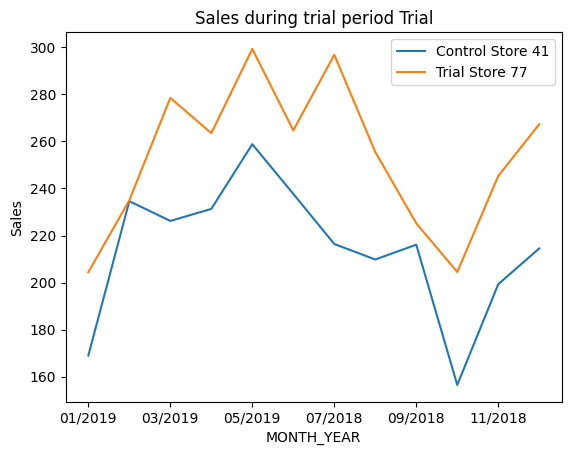

In [41]:
grouped41["TOT_SALES"].sum().plot(label = "Control Store 41")
grouped77["TOT_SALES"].sum().plot(label = "Trial Store 77")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales during trial period Trial")
plt.show()

In [ ]:
FOR THE FIRST PAIR WE CAN SEE A CLEAR DIFFERENCE BETWEEN THE TRIAL STORE AND THE CONTROL STORE. LETS LOOK AT THE NEXT PAIR OF STORES.

LETS START WITH STORE 86 & 109

In [42]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD
trial_store_86[["TOT_SALES", "PROD_QTY"]].sum()

,0
TOT_SALES,10635.35
PROD_QTY,3066.00


In [43]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD
control_store_109[["TOT_SALES", "PROD_QTY"]].sum()

,0
TOT_SALES,10399.1
PROD_QTY,2977.0


In [44]:
# LOOKING AT REPEAT CUSTOMERS FOR TRIAL STORE
trial_store_86["LYLTY_CARD_NBR"].value_counts()

,count
LYLTY_CARD_NBR,
86112,13
86133,13
86151,12
86008,12
86075,12
...,...
155016,1
155000,1
155007,1


In [45]:
# TOTAL CUSTOMER TRANSACTIONS
trial_store_86[["LYLTY_CARD_NBR"]].count()

,0
LYLTY_CARD_NBR,1538


In [46]:
# WE HAVE 123 REPEAT CUSTOMERS FOR STORE 86
repeat_customers_86 = trial_store_86["LYLTY_CARD_NBR"].value_counts()
repeat_customers_86.iloc[:125]

,count
LYLTY_CARD_NBR,
86112,13
86133,13
86151,12
86008,12
86075,12
...,...
86236,6
86005,6
86242,6


In [47]:
# LOOKING AT REPEAT CUSTOMERS FOR CONTROL STORE
control_store_109["LYLTY_CARD_NBR"].value_counts()

,count
LYLTY_CARD_NBR,
109036,16
109080,14
109086,13
109255,12
109094,12
...,...
109131,1
109134,1
109200,1


In [48]:
# TOTAL CUSTOMER TRANSACTIONS
control_store_109[["LYLTY_CARD_NBR"]].count()

,0
LYLTY_CARD_NBR,1505


In [49]:
# WE HAVE 111 REPEAT CUSTOMERS FOR STORE 86
repeat_customers_109 = control_store_109["LYLTY_CARD_NBR"].value_counts()
repeat_customers_109.iloc[:115]

,count
LYLTY_CARD_NBR,
109036,16
109080,14
109086,13
109255,12
109094,12
...,...
109020,6
109074,6
109065,6


In [50]:
# GROUPING STORES BY MONTH
grouped86 = trial_store_86.groupby("MONTH_YEAR")
grouped109 = control_store_109.groupby("MONTH_YEAR")

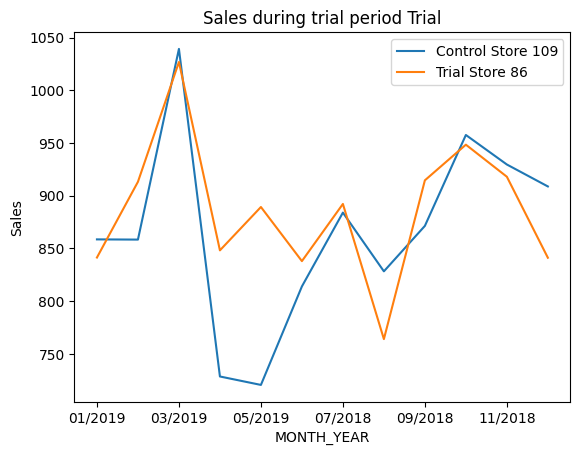

In [51]:
grouped109["TOT_SALES"].sum().plot(label = "Control Store 109")
grouped86["TOT_SALES"].sum().plot(label = "Trial Store 86")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales during trial period Trial")
plt.show()

In [ ]:
FOR THE SECOND PAIR WE CAN SEE A CLEAR DIFFERENCE BETWEEN THE TRIAL STORE AND THE CONTROL STORE. LETS LOOK AT THE NEXT PAIR OF STORES.

LETS START WITH STORE 88 & 201

In [52]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD
trial_store_88[["TOT_SALES", "PROD_QTY"]].sum()

,0
TOT_SALES,16333.25
PROD_QTY,3718.00


In [53]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD
control_store_201[["TOT_SALES", "PROD_QTY"]].sum()

,0
TOT_SALES,14298.7
PROD_QTY,3262.0


In [54]:
# LOOKING AT REPEAT CUSTOMERS FOR TRIAL STORE
trial_store_88["LYLTY_CARD_NBR"].value_counts()

,count
LYLTY_CARD_NBR,
88105,13
88358,11
88247,11
88153,10
88352,10
...,...
88046,1
88355,1
88196,1


In [55]:
# TOTAL CUSTOMER TRANSACTIONS
trial_store_88[["LYLTY_CARD_NBR"]].count()

,0
LYLTY_CARD_NBR,1873


In [56]:
# WE HAVE 145 REPEAT CUSTOMERS FOR STORE 86
repeat_customers_88 = trial_store_88["LYLTY_CARD_NBR"].value_counts()
repeat_customers_88.iloc[:146]

,count
LYLTY_CARD_NBR,
88105,13
88358,11
88247,11
88153,10
88352,10
...,...
88061,6
88167,6
88103,6


In [57]:
# LOOKING AT REPEAT CUSTOMERS FOR CONTROL STORE
control_store_201["LYLTY_CARD_NBR"].value_counts()

,count
LYLTY_CARD_NBR,
201294,13
201186,11
201120,11
201018,10
201206,10
...,...
201135,1
201057,1
201323,1


In [58]:
# TOTAL CUSTOMER TRANSACTIONS
control_store_201[["LYLTY_CARD_NBR"]].count()

,0
LYLTY_CARD_NBR,1654


In [59]:
# WE HAVE 109 REPEAT CUSTOMERS FOR STORE 86
repeat_customers_109 = control_store_109["LYLTY_CARD_NBR"].value_counts()
repeat_customers_109.iloc[:110]

,count
LYLTY_CARD_NBR,
109036,16
109080,14
109086,13
109255,12
109094,12
...,...
109202,6
109217,6
109157,6


In [60]:
# GROUPING STORES BY MONTH
grouped88 = trial_store_88.groupby("MONTH_YEAR")
grouped201 = control_store_201.groupby("MONTH_YEAR")

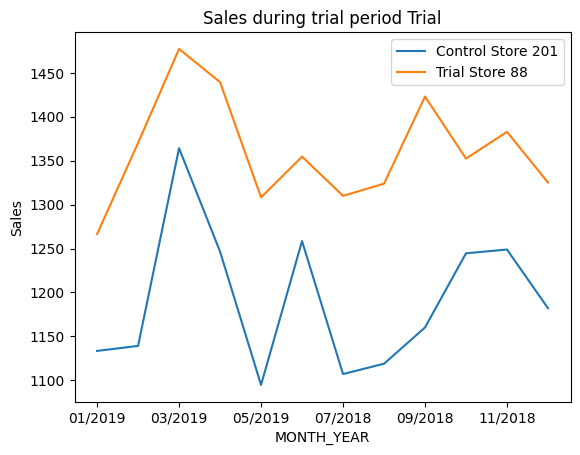

In [61]:
grouped201["TOT_SALES"].sum().plot(label = "Control Store 201")
grouped88["TOT_SALES"].sum().plot(label = "Trial Store 88")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales during trial period Trial")
plt.show()

In [ ]:
FOR THE THIRD PAIR WE CAN SEE A CLEAR DIFFERENCE BETWEEN THE TRIAL STORE AND THE CONTROL STORE. LETS LOOK AT THE NEXT PAIR OF STORES.

LETS VISUALIZE THE PRODUCT QUANTITY SOLD

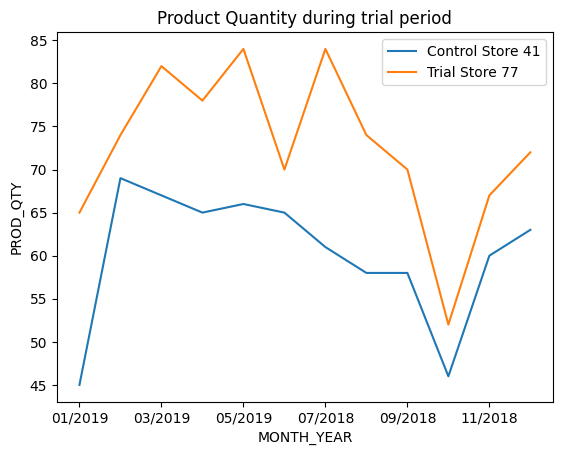

In [62]:
grouped41["PROD_QTY"].sum().plot(label = "Control Store 41")
grouped77["PROD_QTY"].sum().plot(label = "Trial Store 77")
plt.ylabel("PROD_QTY")
plt.legend()
plt.title("Product Quantity during trial period")
plt.show()

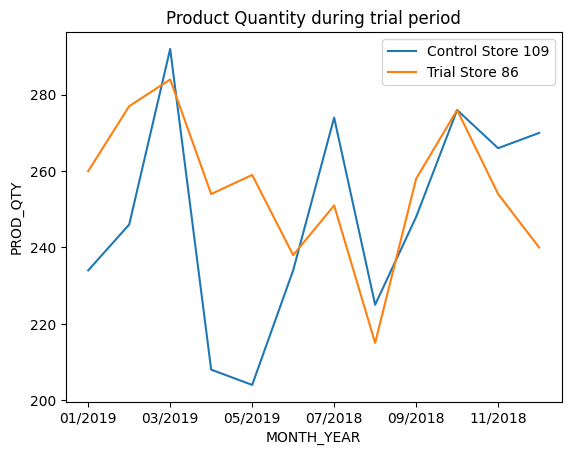

In [63]:
grouped109["PROD_QTY"].sum().plot(label = "Control Store 109")
grouped86["PROD_QTY"].sum().plot(label = "Trial Store 86")
plt.ylabel("PROD_QTY")
plt.legend()
plt.title("Product Quantity during trial period")
plt.show()

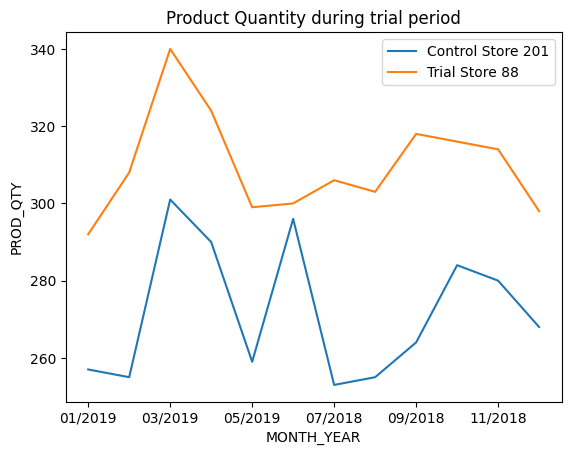

In [64]:
grouped201["PROD_QTY"].sum().plot(label = "Control Store 201")
grouped88["PROD_QTY"].sum().plot(label = "Trial Store 88")
plt.ylabel("PROD_QTY")
plt.legend()
plt.title("Product Quantity during trial period")
plt.show()

In [ ]:
AS WE CAN SEE BY THE GRAPHS ABOVE THE TRIAL STORES OUTPERFORMED THE CONTROL STORES BY QUANTITY SOLD.

LETS SEE HOW THEY STACK UP WITH AVERAGE TRANSACTIONS PER CUSTOMER

In [65]:
grouped77["LYLTY_CARD_NBR"].value_counts().mean()

1.048417132216015

In [66]:
grouped41["LYLTY_CARD_NBR"].value_counts().mean()

1.05

In [67]:
grouped86["LYLTY_CARD_NBR"].value_counts().mean()

1.2544861337683524

In [68]:
grouped109["LYLTY_CARD_NBR"].value_counts().mean()

1.2918454935622317

In [69]:
grouped88["LYLTY_CARD_NBR"].value_counts().mean()

1.2363036303630364

In [70]:
grouped201["LYLTY_CARD_NBR"].value_counts().mean()

1.1689045936395759

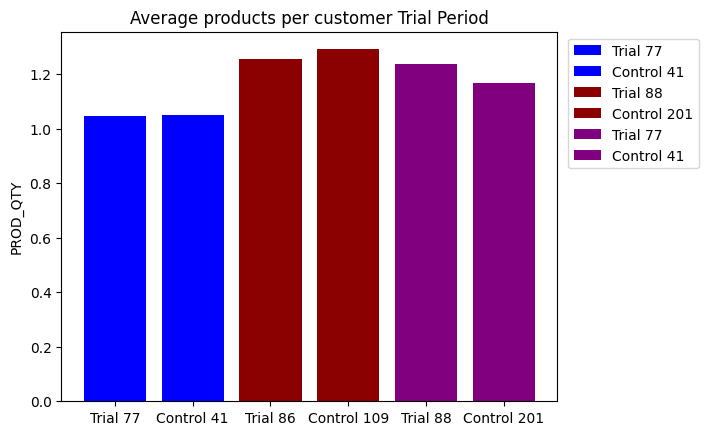

In [71]:
group1 = ["Trial 77", "Control 41"]
group2 = ["Trial 86", "Control 109"]
group3 = ["Trial 88", "Control 201"]
values_grp_1 = [1.048417132216015, 1.05]
values_grp_2 = [1.2544861337683524, 1.2918454935622317]
values_grp_3 = [1.2363036303630364, 1.1689045936395759]

plt.bar(group1, values_grp_1, label = group1, color = "blue")
plt.bar(group2, values_grp_2, label = group3, color = "darkred")
plt.bar(group3, values_grp_3, label = group1, color = "purple")

plt.ylabel("PROD_QTY")
plt.legend(loc = "upper right", bbox_to_anchor = (1.3, 1))
plt.title("Average products per customer Trial Period")
plt.show()

In [ ]:
AS WE CAN SEE THE AVERAGE TRANSACTIONS WERE SLIGHTLY HIGHER FOR 1 OF THE 3 TRIAL STORES.

I BELIEVE THE NEW LAYOUT IS WORKING TO INCREASE SALES. SALES, PRODUCTS SOLD, AMOUNT OF REPEAT CUSTOMERS AND AVERAGE TRANSACTIONS PER CUSTOMER ALL SHOW SIGNS THATS THE TRIAL STORES ARE OUTPERFORMING THE CONTROL STORES.

MY RECOMMENDATION WOULD BE TO INCREASE THE AMOUNT OF TRIAL STORES AND TO RUN ANOTHER ANALYSIS IN 3 MONTHS TO SEE IF THE INCREASED SALES STAY TRUE AND STABILIZE AT A HIGHER POINT.